<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/notesbooks/IT24104191_Encoding_categorical_variables%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git


train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"





fatal: destination path 'Brain-Tumor-Detection' already exists and is not an empty directory.


Total images found: 5712
Unique labels: {'meningioma', 'glioma', 'notumor', 'pituitary'}

Class Mapping (Label Encoding):
glioma → 0
meningioma → 1
notumor → 2
pituitary → 3

First 10 Encoded Labels: [1 1 1 1 1 1 1 1 1 1]

Shape of One-Hot Encoded Labels: (5712, 4)
Example (first 5 one-hot labels):
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


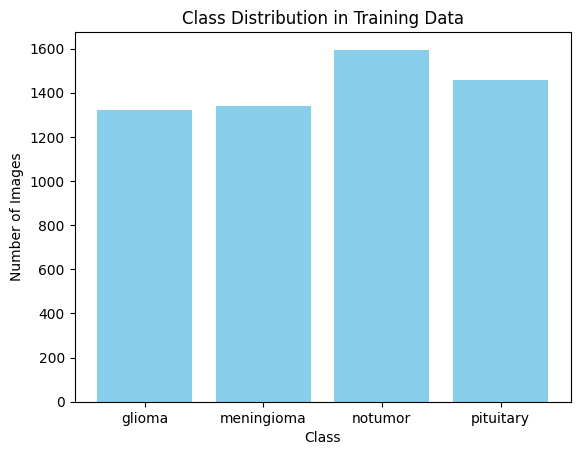

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



# Step 1: Collect dataset paths & labels

image_paths = []
labels = []

# Each subfolder = class name
for class_name in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_name))
            labels.append(class_name)   # raw string label

print("Total images found:", len(image_paths))
print("Unique labels:", set(labels))


# Step 2: Label Encoding

le = LabelEncoder()
label_encoded = le.fit_transform(labels)

print("\nClass Mapping (Label Encoding):")
for cls, idx in zip(le.classes_, range(len(le.classes_))):
    print(f"{cls} → {idx}")

print("\nFirst 10 Encoded Labels:", label_encoded[:10])


# Step 3: One-Hot Encoding

one_hot_labels = to_categorical(label_encoded)

print("\nShape of One-Hot Encoded Labels:", one_hot_labels.shape)
print("Example (first 5 one-hot labels):\n", one_hot_labels[:5])


# Step 4: EDA - Class Distribution

unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts, color="skyblue")
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

